In [1]:
from datetime import datetime
now = datetime.now()
print(now)

2021-01-27 20:06:11.909245


In [2]:
print("Name : Ramesh Bhutka")
print("Sap ID:- 53004190003")

Name : Ramesh Bhutka
Sap ID:- 53004190003


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Ramesh-Bhutka/Rule-model/main/retail_dataset.csv")
# df=pd.read_csv('C:/Users/User/Downloads/datasets/beginner_datasets/groceries - groceries.csv')
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [5]:
df.shape

(315, 7)

In [6]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [7]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

ohe_df = pd.DataFrame(encoded_vals)

In [8]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.361905,(Pencil)
3,0.504762,(Bread)
4,0.476190,(Meat)
5,0.438095,(Wine)
6,0.501587,(Cheese)


In [9]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891


In [10]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(Milk, Cheese)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
10,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
11,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
12,"(Eggs, Cheese)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773
13,"(Meat, Cheese)",(Eggs),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714


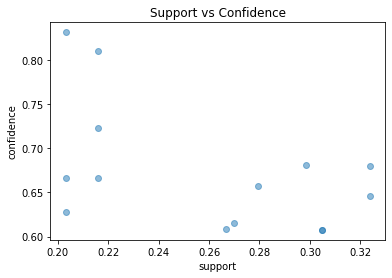

In [11]:
# Support vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

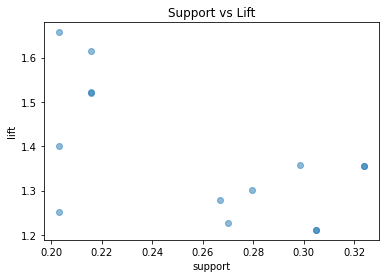

In [12]:
#  Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

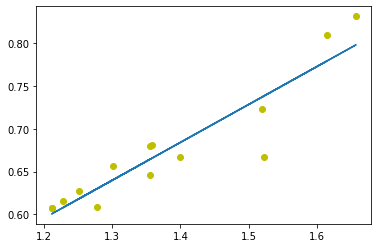

In [13]:
# Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))